In [547]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
from datetime import datetime
from datetime import datetime, timezone

Đọc dữ liệu

In [548]:
df = pd.read_csv('data_youtube.csv', header = 0)
df

,video_channelId,video_channelTitle,video_channelSubscriber,video_id,video_title,video_publishedAt,video_description,video_thumbnails,video_tags,video_categoryId,video_viewCount,video_likeCount,video_commentCount,video_duration_teaser,video_id_mv_official,video_title_mv_official,video_publishedAt_mv_official,video_duration_mv_official,video_viewCount_mv_official,total_hour_mv_published
0,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,68800000,-4nt67qPIXs,SEVENTEEN (세븐틴) 'DREAM' Official Teaser,2022-11-03 14:59:56+00:00,SEVENTEEN (세븐틴) 'DREAM' Official Teaser\n\nCre...,https://i.ytimg.com/vi/-4nt67qPIXs/default.jpg,"['HYBE', 'HYBE LABELS', '하이브', '하이브레이블즈']",10,1297299.0,214557.0,4831.0,PT34S,6H8QHeC_VPs,SEVENTEEN (세븐틴) 'DREAM' Official MV,2022-10-30 05:58:21+00:00,PT3M9S,1.0,10834.0
1,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,68800000,LJD49PgX3AM,진 (Jin) 'The Astronaut' Official Teaser,2022-10-26 15:00:01+00:00,진 (Jin) 'The Astronaut' Official Teaser\n\nCre...,https://i.ytimg.com/vi/LJD49PgX3AM/default.jpg,"['HYBE', 'HYBE LABELS', '하이브', '하이브레이블즈']",10,5506350.0,1236780.0,54757.0,PT38S,c6ASQOwKkhk,진 (Jin) 'The Astronaut' Official MV,2022-10-28 04:00:01+00:00,PT5M20S,36864743.0,13832.0
2,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,68800000,irZ7Q55v7RA,ENHYPEN (엔하이픈) 'Future Perfect (Pass the MIC) ...,2022-10-20 15:00:03+00:00,本映像の撮影は、ソヌの体調不良による休養期間中に行われました。何卒ご理解頂きますようお願い申...,https://i.ytimg.com/vi/irZ7Q55v7RA/default.jpg,"['HYBE', 'HYBE LABELS', '하이브', '하이브레이블즈']",10,809913.0,122940.0,2267.0,PT23S,7fQQekOZWLk,ENHYPEN (엔하이픈) 'Future Perfect (Pass the MIC) ...,2022-10-25 15:00:01+00:00,PT3M15S,2279812.0,17492.0
3,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,68800000,vVSDsy52Dok,ENHYPEN (엔하이픈) 'Future Perfect (Pass the MIC) ...,2022-10-18 15:00:02+00:00,本映像の撮影は、ソヌの体調不良による休養期間中に行われました。何卒ご理解頂きますようお願い申...,https://i.ytimg.com/vi/vVSDsy52Dok/default.jpg,"['HYBE', 'HYBE LABELS', '하이브', '하이브레이블즈']",10,719147.0,114481.0,3877.0,PT16S,7fQQekOZWLk,ENHYPEN (엔하이픈) 'Future Perfect (Pass the MIC) ...,2022-10-25 15:00:01+00:00,PT3M15S,2279812.0,17492.0
4,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,68800000,8skl6AxMyec,LE SSERAFIM (르세라핌) 'ANTIFRAGILE' M/V TEASER 2,2022-10-15 15:00:00+00:00,Creative Director : NU KIM\n\nVisual Creative ...,https://i.ytimg.com/vi/8skl6AxMyec/default.jpg,"['HYBE', 'HYBE LABELS', '하이브', '하이브레이블즈']",10,3154074.0,253512.0,5407.0,PT20S,pyf8cbqyfPs,LE SSERAFIM (르세라핌) 'ANTIFRAGILE' OFFICIAL M/V,2022-10-16 14:58:08+00:00,PT3M52S,54117157.0,30454.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,UCayQxFAoFCvGariuQCtHRGQ,WINNER,4000000,_rrDskxit9g,WINNER - ‘EVERYDAY’ M/V TEASER,2018-03-29 00:00:01+00:00,#WINNER #위너 #THE2NDALBUM #EVERYD4Y #TITLE #EVE...,https://i.ytimg.com/vi/_rrDskxit9g/default.jpg,"['위너', 'WINNER', '이승훈', '송민호', '김진우', '강승윤', '...",10,820210.0,66319.0,4266.0,PT13S,d1D1SJ-KqaQ,WINNER - 'EVERYDAY' M/V,2018-04-04 09:00:04+00:00,PT3M35S,73982442.0,2415452.0
866,UCayQxFAoFCvGariuQCtHRGQ,WINNER,4000000,LJWt9qyB8KU,WINNER - ‘ISLAND’ M/V TEASER,2017-08-03 01:00:01+00:00,#WINNER #위너 #ISLAND #아일랜드 #MV #TEASER #COMEBAC...,https://i.ytimg.com/vi/LJWt9qyB8KU/default.jpg,"['위너', 'WINNER', '김진우', '송민호', '이승훈', '강승윤']",10,845111.0,67623.0,3698.0,PT41S,kRj4toENrnA,WINNER - 'ISLAND' M/V,2017-08-04 07:00:06+00:00,PT3M37S,46067374.0,2765492.0
867,UCayQxFAoFCvGariuQCtHRGQ,WINNER,4000000,Qr2PiTE_uIE,WINNER - ‘LOVE ME LOVE ME’ M/V TEASER,2017-08-02 01:03:24+00:00,#WINNER #위너 #LOVEMELOVEME #LMLM #럽미럽미 #MV #TEA...,https://i.ytimg.com/vi/Qr2PiTE_uIE/default.jpg,"['위너', 'WINNER', '김진우', '송민호', '이승훈', '강승윤']",10,1161795.0,85929.0,4794.0,PT27S,ppOWR7ZLl7Q,WINNER - 'LOVE ME LOVE ME' M/V,2017-08-04 07:00:03+00:00,PT3M43S,35052431.0,2765492.0
868,UCayQxFAoFCvGariuQCtHRGQ,WINNER,4000000,UzySFs32UIU,WINNER - ‘FOOL’ M/V TEASER,2017-04-01 07:04:01+00:00,#WINNER #위너 #FOOL #MV #TEASER #COMEBACK #0404 ...,https://i.ytimg.com/vi/UzySFs32UIU/default.jpg,"['위너', 'WINNER', '김진우', '송민호', '이승훈', '강승윤', '...",10,810161.0,45459.0,2939.0,PT27S,GsebMOWQ

In [549]:
df['video_publishedAt']  = pd.to_datetime(df['video_publishedAt'])
df['video_publishedAt_mv_official']  = pd.to_datetime(df['video_publishedAt_mv_official'])

In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   video_channelId                870 non-null    object             
 1   video_channelTitle             870 non-null    object             
 2   video_channelSubscriber        870 non-null    int64              
 3   video_id                       870 non-null    object             
 4   video_title                    870 non-null    object             
 5   video_publishedAt              870 non-null    datetime64[ns, UTC]
 6   video_description              869 non-null    object             
 7   video_thumbnails               870 non-null    object             
 8   video_tags                     808 non-null    object             
 9   video_categoryId               870 non-null    int64              
 10  video_viewCount           

Các hàm tạo thêm feature

In [551]:
# độ dài video (tính bằng giây)
def convert_duration_to_seconds(duration):
    x = re.findall("\d+", duration)
    seconds = 0
    if len(x)== 1 and duration.count('M')==0:
        seconds = int(x[0])
    elif len(x)== 1 and duration.count('S')==0:
        seconds = int(x[0])*60
    elif len(x)== 2:
        seconds = int(x[0])*60+int(x[1])
    return seconds

In [552]:
def get_seconds_video(df1, column):
    total_second = []
    column_list = list(df1[column])
    for value in column_list:
        if isinstance(value,str):
            total_second.append(convert_duration_to_seconds(value))
        else:
            total_second.append(np.nan)
    return total_second

In [553]:
# chuyển tags dạng string sang list
def convert_tags_to_list(string_tag):
    list_tag= re.sub('\\[|\\]','',string_tag).split(',')
    return list_tag

In [554]:
# tính len tags
def len_tags_teaser(df1):
    no_tags = []
    list_tags_teaser = list(df1['video_tags'])
    for list_tag in list_tags_teaser:
       
        if isinstance(list_tag,str):
            no_tags.append(len(convert_tags_to_list(list_tag)))
        else:
            no_tags.append(np.nan)
    return no_tags

In [555]:
# tính len của các gia trị có dạng string trong 1 cột
def len_feature_teaser(df1, column):
    len_features = []
    feature_teaser = list(df1[column])

    for value in feature_teaser :
        if isinstance(value,str):
            len_features.append(len(value))
        else:
            len_features.append(np.nan)
    return len_features

In [556]:
def total_hour_mv_teaser_publish(df1):
    list_total_seconds = []
    for i in range(df1.shape[0]):
        time_teaser = df1.iloc[i]['video_publishedAt'].to_pydatetime()
        time_mv = df1.iloc[i]['video_publishedAt_mv_official'].to_pydatetime()
        diff = time_mv -time_teaser
        list_total_seconds.append(diff.total_seconds()/60)
    return list_total_seconds

Phân tích dữ liệu

In [557]:
df_v1 = df.copy()

In [558]:
df_v1['video_num_tag'] = len_tags_teaser(df_v1)
df_v1['video_title_len'] = len_feature_teaser(df_v1,'video_title')
df_v1['video_description_len'] = len_feature_teaser(df_v1,'video_description')
df_v1['video_teaser_seconds'] = get_seconds_video(df_v1, 'video_duration_teaser')
df_v1['video_mv_seconds'] = get_seconds_video(df_v1, 'video_duration_mv_official')
df_v1['total_hour_mv_teaser_publish'] = total_hour_mv_teaser_publish(df_v1)


In [559]:
num_pre = ['video_channelSubscriber',
#  'video_categoryId',
 'video_viewCount',
 'video_likeCount',
 'video_commentCount',
 'video_num_tag',
 'video_title_len',
 'video_description_len',
 'video_teaser_seconds',
 'video_mv_seconds',
 'total_hour_mv_teaser_publish',
 'total_hour_mv_published',
 'video_viewCount_mv_official',]

In [560]:
df_num = df_v1[num_pre]

In [561]:
df_num.describe()

,video_channelSubscriber,video_viewCount,video_likeCount,video_commentCount,video_num_tag,video_title_len,video_description_len,video_teaser_seconds,video_mv_seconds,total_hour_mv_teaser_publish,total_hour_mv_published,video_viewCount_mv_official
count,8.700000e+02,8.700000e+02,8.670000e+02,8.700000e+02,808.000000,870.000000,869.000000,870.000000,870.000000,8.700000e+02,8.700000e+02,8.700000e+02
mean,3.692062e+07,2.259950e+06,2.432895e+05,1.565995e+04,19.344059,44.463218,635.589183,29.455172,231.640230,1.185474e+04,1.843787e+06,6.908463e+07
std,1.910595e+07,5.934575e+06,5.626254e+05,6.175206e+04,14.350039,13.586459,486.143645,11.456414,45.395873,8.386545e+04,1.483083e+06,1.757387e+08
min,5.450000e+05,2.643200e+04,2.440000e+02,2.300000e+01,2.000000,21.000000,33.000000,11.000000,14.000000,-1.414509e+05,1.083400e+04,1.000000e+00
25%,3.100000e+07,2.756122e+05,2.551050e+04,1.254750e+03,8.000000,34.000000,351.000000,22.000000,206.000000,1.800017e+03,7.047320e+05,3.816828e+06
50%,3.100000e+07,7.905005e+05,7.759900e+04,3.702500e+03,15.000000,42.000000,495.000000,28.000000,224.000000,2.934208e+03,1.547672e+06,1.528409e+07
75%,3.100000e+07,1.979833e+06,2.439910e+05,9.877500e+03,27.000000,52.000000,696.000000,33.000000,249.000000,5.759996e+03,2.668083e+06,5.770668e+07
max,8.280000e+07,7.456300e+07,6.455013e+06,1.120651e+06,75.000000,100.000000,2955.000000,115.000000,506.000000,1.640160e+06,6.930225e+06,1.974920e+09


In [562]:
df_num= df_num[df_num['total_hour_mv_teaser_publish']>0] 
df_num= df_num[df_num['video_viewCount_mv_official']>1]

In [563]:
df_num.describe()

,video_channelSubscriber,video_viewCount,video_likeCount,video_commentCount,video_num_tag,video_title_len,video_description_len,video_teaser_seconds,video_mv_seconds,total_hour_mv_teaser_publish,total_hour_mv_published,video_viewCount_mv_official
count,8.650000e+02,8.650000e+02,8.620000e+02,8.650000e+02,803.000000,865.000000,864.000000,865.000000,865.000000,8.650000e+02,8.650000e+02,8.650000e+02
mean,3.686745e+07,2.264395e+06,2.428664e+05,1.570806e+04,19.357410,44.416185,635.578704,29.389595,231.697110,1.220866e+04,1.832828e+06,6.882751e+07
std,1.909641e+07,5.948938e+06,5.627861e+05,6.192011e+04,14.364355,13.548019,486.340072,11.425570,45.420064,8.388989e+04,1.465220e+06,1.754503e+08
min,5.450000e+05,2.643200e+04,2.440000e+02,3.700000e+01,2.000000,21.000000,33.000000,11.000000,14.000000,2.318333e+01,1.383200e+04,5.406000e+04
25%,3.100000e+07,2.779870e+05,2.585025e+04,1.265000e+03,8.000000,34.000000,352.500000,22.000000,206.000000,1.800050e+03,7.047320e+05,3.816828e+06
50%,3.100000e+07,7.913280e+05,7.761000e+04,3.707000e+03,15.000000,42.000000,495.000000,27.000000,224.000000,2.969700e+03,1.546772e+06,1.547175e+07
75%,3.100000e+07,1.981056e+06,2.445960e+05,9.887000e+03,27.000000,52.000000,696.750000,33.000000,249.000000,5.760033e+03,2.640092e+06,5.775230e+07
max,8.280000e+07,7.456300e+07,6.455013e+06,1.120651e+06,75.000000,100.000000,2955.000000,115.000000,506.000000,1.640160e+06,6.930225e+06,1.974920e+09


<AxesSubplot:>

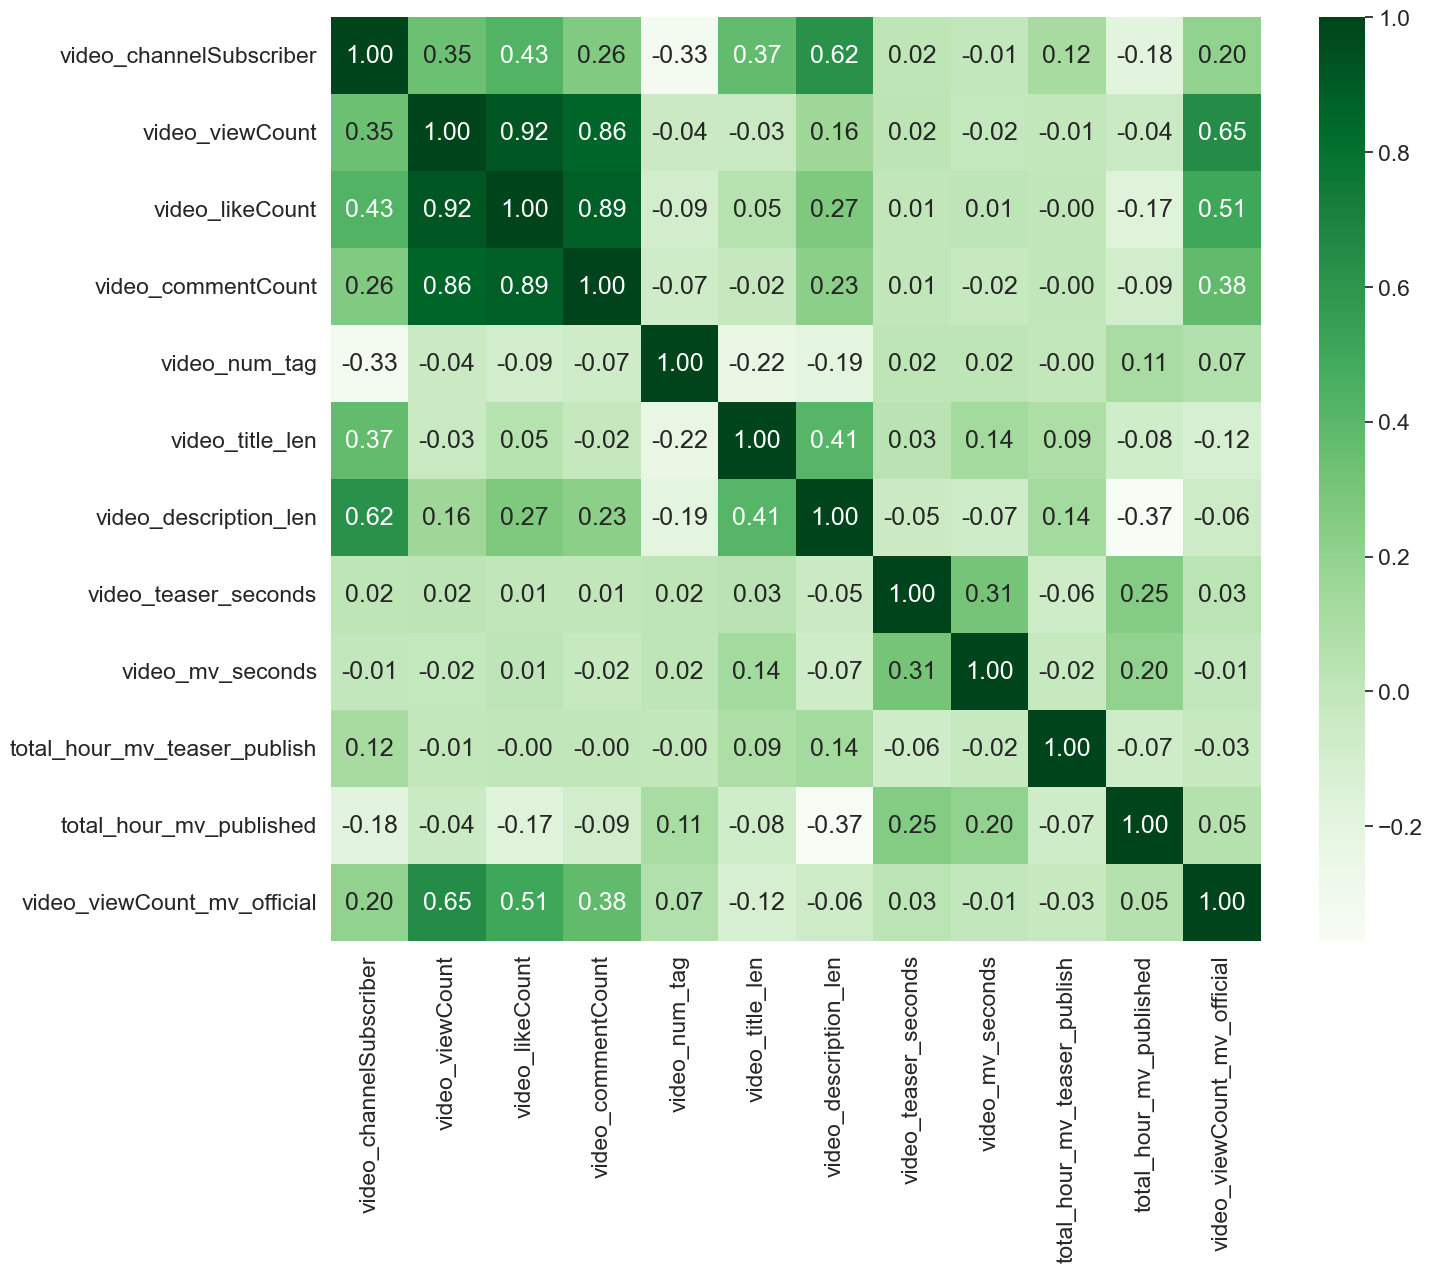

In [564]:
corr_= df_num.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap="Greens")

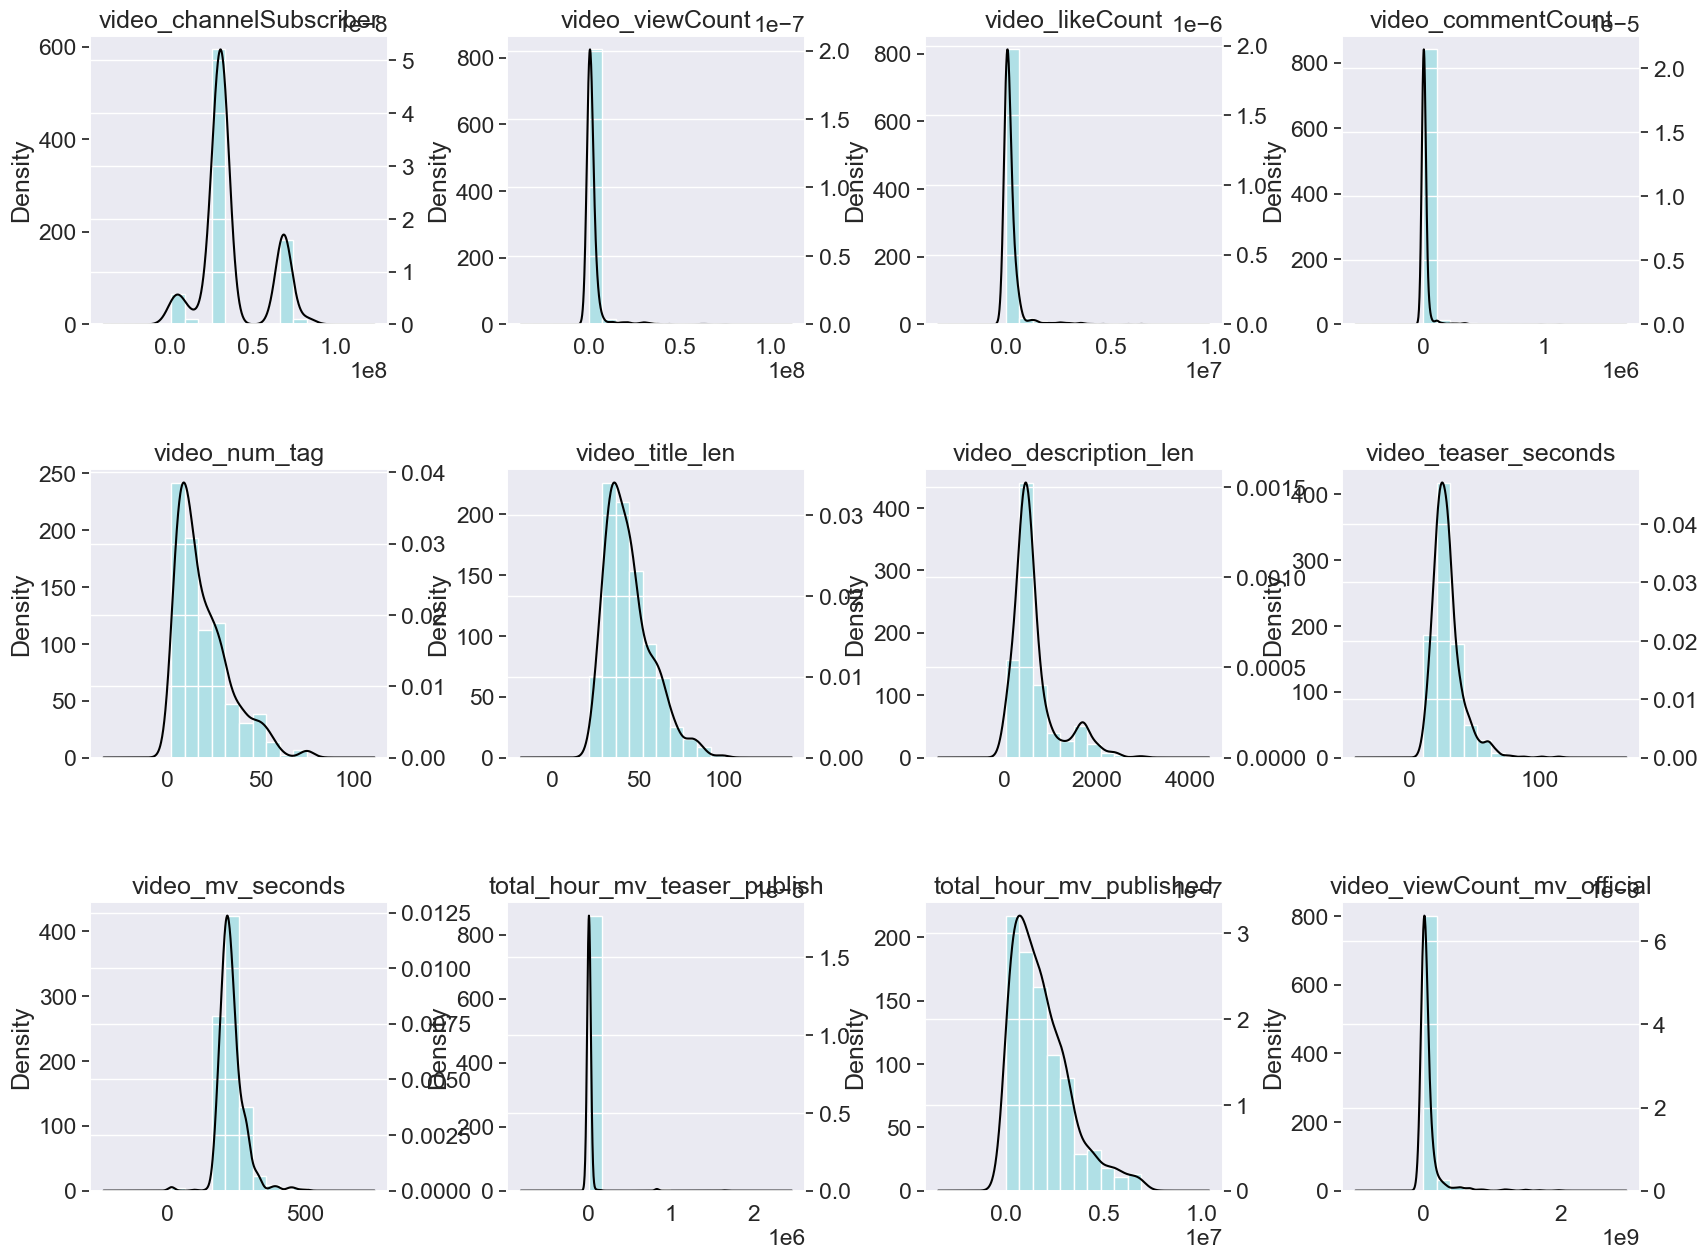

In [565]:
data_num = df_num[num_pre]
plt.figure(figsize= (20, 15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.5)
for i, (name, col) in enumerate(data_num.iteritems()):
    plt.subplot(3, 4, i+1)
    col.hist( color='powderblue')
    ax2 = col.plot.kde( secondary_y=True, title=name, color='black')
    ax2.set_ylim(0)

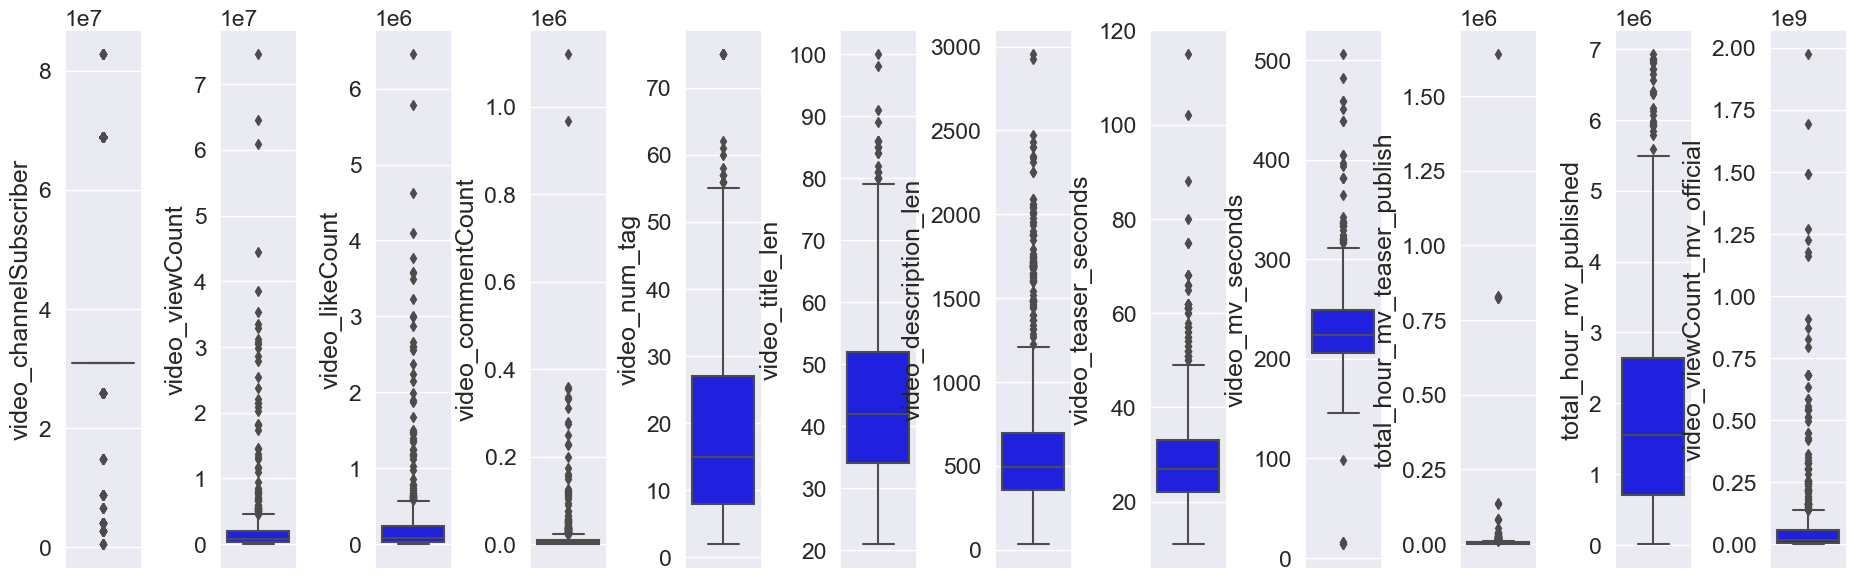

In [566]:
plt.figure(figsize=(25, 7))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=0.5)
for i in range(0, len(num_pre)):
    plt.subplot(1, 13, i+1)
    sns.boxplot(y=df_num[num_pre[i]],color='blue',orient='v')

In [567]:
q25,q75 = np.percentile(a = df_num['video_viewCount_mv_official'],q=[25,75])
IQR = q75 - q25
lower_limit = q25 - 1.5*IQR
upper_limit = q75 + 1.5*IQR
df_num = df_num[(df_num['video_viewCount_mv_official']> lower_limit) &(df_num['video_viewCount_mv_official']<upper_limit)]


In [568]:
q25,q75 = np.percentile(a = df_num['video_viewCount'],q=[25,75])
IQR = q75 - q25
lower_limit = q25 - 1.5*IQR
upper_limit = q75 + 1.5*IQR
df_num = df_num[(df_num['video_viewCount']> lower_limit) &(df_num['video_viewCount']<upper_limit)]

In [569]:
# df_num = df_num[(df_num['video_viewCount_mv_official']> lower_limit) &(df_num['video_viewCount_mv_official']<upper_limit)]
# df_num = df_num[(df_num['total_hour_mv_teaser_publish'] < 0.5e6) ]
# df_num = df_num[(df_num['video_viewCount'] < 4e7) ]
# df_num = df_num[df_num['video_mv_seconds'] <600]
# df_num = df_num[df_num['video_teaser_seconds'] <100]
# df_num = df_num[df_num['video_likeCount'] <2e6]
# df_num = df_num[df_num['video_commentCount'] <0.4e6]

In [570]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 2 to 868
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   video_channelSubscriber       719 non-null    int64  
 1   video_viewCount               719 non-null    float64
 2   video_likeCount               716 non-null    float64
 3   video_commentCount            719 non-null    float64
 4   video_num_tag                 664 non-null    float64
 5   video_title_len               719 non-null    int64  
 6   video_description_len         718 non-null    float64
 7   video_teaser_seconds          719 non-null    int64  
 8   video_mv_seconds              719 non-null    int64  
 9   total_hour_mv_teaser_publish  719 non-null    float64
 10  total_hour_mv_published       719 non-null    float64
 11  video_viewCount_mv_official   719 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 73.0 KB


In [571]:
df_num['video_num_tag'].fillna(df_num['video_num_tag'].mean(),  inplace=True)
df_num['video_description_len'].fillna(df_num['video_description_len'].mean(),  inplace=True)
df_num['video_likeCount'].fillna(df_num['video_likeCount'].mean(),  inplace=True)

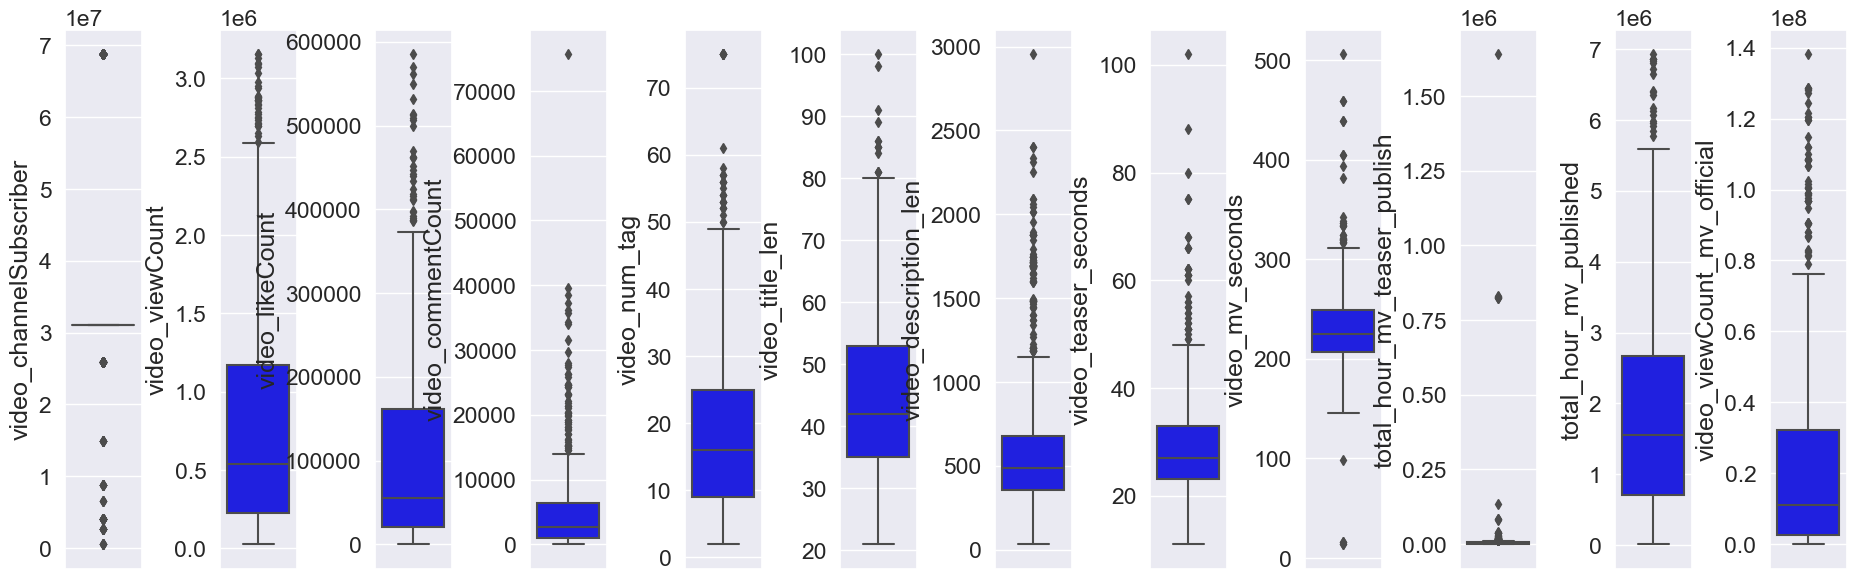

In [572]:
plt.figure(figsize=(25, 7))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=0.5)
for i in range(0, len(num_pre)):
    plt.subplot(1, 13, i+1)
    sns.boxplot(y=df_num[num_pre[i]],color='blue',orient='v')

In [573]:
# sns.boxplot(y=df_num['video_viewCount_mv_official'],color='blue',orient='v')

In [574]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [575]:
df_train, df_test = train_test_split(df_num, test_size=0.2, random_state= 43, shuffle= True)
X_train = df_train.copy()
y_train = X_train.pop("video_viewCount_mv_official")

X_test = df_test.copy()
y_test = X_test.pop("video_viewCount_mv_official")

In [576]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [577]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) 
    print("MSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) 
    print('R2 score: %.2f' % r2_score(ytest, pred)) 

In [578]:
# # LINEAR REGRESSION

from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)

# predicting the  test set results
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


eval_regression(model, y_pred_test, X_train, y_train, X_test, y_test)

MAE: 14447695.85
MSE: 22349176.36
R2 score: 0.40


In [579]:
from sklearn.linear_model import Ridge
reg_ridge = Ridge(alpha = 3)
reg_ridge.fit(X_train, y_train)
y_pred = reg_ridge.predict(X_test)
eval_regression(reg_ridge, y_pred, X_train, y_train, X_test, y_test)

MAE: 14251317.73
MSE: 21996406.78
R2 score: 0.41


In [580]:
from sklearn.linear_model import Lasso


reg_lasso = Lasso(alpha = 3)
reg_lasso.fit(X_train, y_train)

y_pred = reg_lasso.predict(X_test)
eval_regression(reg_lasso, y_pred, X_train, y_train, X_test, y_test)


MAE: 14447682.69
MSE: 22349166.03
R2 score: 0.40


In [581]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state= 103)
best_model1 = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
eval_regression(rf, y_pred, X_train, y_train, X_test, y_test)



MAE: 12715893.09
MSE: 20697892.83
R2 score: 0.48


In [582]:
bb = rf.predict(X_train)

In [583]:
d11 = {'True Labels':y_train, 'Predicted Labels': bb}
SK1 = pd.DataFrame(data = d11)
SK1['diff'] = abs(SK1['True Labels']- SK1['Predicted Labels'])

In [584]:
SK1

,True Labels,Predicted Labels,diff
501,227484.0,2.441155e+05,16631.46
748,34820049.0,3.094137e+07,3878675.83
789,11006982.0,1.692700e+07,5920014.42
83,87012936.0,7.971551e+07,7297425.96
613,17261963.0,1.967532e+07,2413358.62
...,...,...,...
20,6206020.0,2.366964e+07,17463619.77
77,56950739.0,5.390818e+07,3042557.39
339,21047638.0,2.793994e+07,6892298.78
315,127190022.0,1.045513e+08,22638730.77


In [585]:
len(y_pred)

144

In [586]:
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
SK['diff'] = abs(SK['True Labels']- SK['Predicted Labels'])
SK[SK['diff']<10000000].reset_index()


,index,True Labels,Predicted Labels,diff
0,169,358243.0,4901703.08,4543460.08
1,502,14281317.0,5550162.72,8731154.28
2,347,44116006.0,49318702.20,5202696.20
3,441,581332.0,401182.43,180149.57
4,527,983195.0,650176.01,333018.99
...,...,...,...,...
78,415,88441.0,377100.09,288659.09
79,170,241609.0,3567947.27,3326338.27
80,542,8098102.0,7291161.91,806940.09
81,398,21519582.0,12533032.37,8986549.63


In [587]:
SK.describe()

,True Labels,Predicted Labels,diff
count,1.440000e+02,1.440000e+02,1.440000e+02
mean,2.286667e+07,2.303267e+07,1.271589e+07
std,2.884120e+07,2.241718e+07,1.638823e+07
min,6.667000e+04,2.968829e+05,2.095588e+04
25%,1.785507e+06,4.362195e+06,1.256609e+06
50%,1.169701e+07,1.332945e+07,7.039969e+06
75%,3.053235e+07,3.820526e+07,1.632957e+07
max,1.286030e+08,7.834348e+07,9.613838e+07


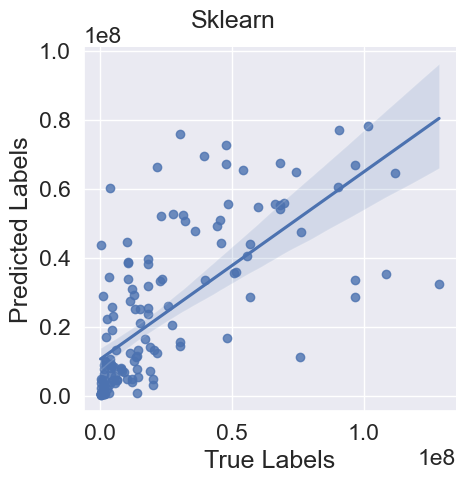

In [588]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK[["True Labels",'Predicted Labels']])
fig1 = lm1.fig 
fig1.suptitle("Sklearn", fontsize=18)
sns.set(font_scale = 1.5)